In [1]:
import os
import sys
import time

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

NOTEBOOKS_DIR: str = os.path.abspath("")
PARENT_DIR: str = os.path.dirname(NOTEBOOKS_DIR)

DATA_DIR: str = os.path.join(PARENT_DIR, "data")

sys.path.append(PARENT_DIR)

from utils.dat_reader import read_dat_file_to_dataframe, multithreading_reader_data_file

QUANTITY_OF_ITERATIONS: int = 100

In [2]:
execution_time_multiple_thread: list = []


for i in range(QUANTITY_OF_ITERATIONS):
    start = time.time()
    df = multithreading_reader_data_file(folder_path=DATA_DIR)
    end = time.time()
    execution_time = end - start
    execution_time_multiple_thread.append(execution_time)

In [3]:
execution_time_single_thread: list = []


files: list[str] = os.listdir(path=DATA_DIR)
dfs: list[pd.DataFrame] = []


for i in range(QUANTITY_OF_ITERATIONS):
    start = time.time()

    for file in files:
        file_path = os.path.join(DATA_DIR, file)
        df = read_dat_file_to_dataframe(file_path=file_path)
        dfs.append(df)

    df = pd.concat(dfs, ignore_index=True)
    end = time.time()

    execution_time = end - start
    execution_time_single_thread.append(execution_time)

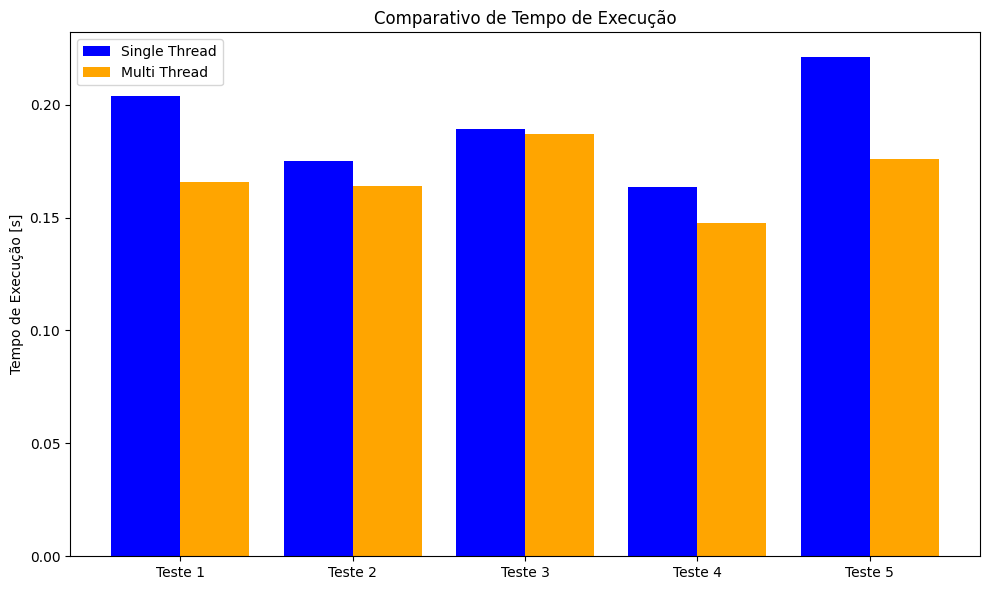

In [10]:
labels = ["Teste 1", "Teste 2", "Teste 3", "Teste 4", "Teste 5"]

# Defina a largura das barras
bar_width = 0.4

# Defina as posições das barras no eixo x
x = np.arange(len(labels))

# Crie um gráfico de barras lado a lado
plt.figure(figsize=(10, 6))

plt.bar(
    x - bar_width / 2,
    execution_time_single_thread[0:5],
    bar_width,
    label="Single Thread",
    color="blue"
)
plt.bar(
    x + bar_width / 2,
    execution_time_multiple_thread[0:5],
    bar_width,
    label="Multi Thread",
    color="orange"
)


plt.ylabel("Tempo de Execução [s]")
plt.title("Comparativo de Tempo de Execução")
plt.xticks(x, labels)
plt.legend()

plt.tight_layout()
plt.show()

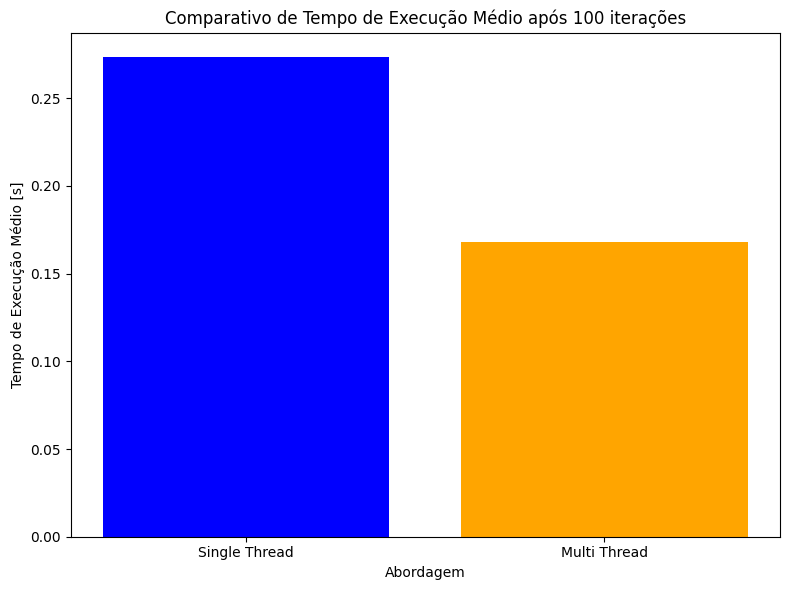

In [11]:
# Exemplo de tempos de execução (substitua com seus próprios dados)
execution_time_single_thread_mean = np.mean(execution_time_single_thread)
execution_time_multiple_thread_mean = np.mean(execution_time_multiple_thread)

# Calcule as médias dos tempos de execução
mean_single_thread = np.mean(execution_time_single_thread)
mean_multi_thread = np.mean(execution_time_multiple_thread)

# Defina os rótulos para as barras
labels = ["Single Thread", "Multi Thread"]

bar_colors = ["blue", "orange"]

# Crie um gráfico de barras lado a lado
plt.figure(figsize=(8, 6))

plt.bar(labels, [mean_single_thread, mean_multi_thread], color=bar_colors)

plt.xlabel("Abordagem")
plt.ylabel("Tempo de Execução Médio [s]")
plt.title(
    f"Comparativo de Tempo de Execução Médio após {QUANTITY_OF_ITERATIONS} iterações"
)
plt.tight_layout()

plt.show()